# Technology Stack Analysis

This notebook extracts and analyzes unique technologies from the Stack Overflow Developer Survey data.
We'll be focusing on the following columns:
- `LanguageHaveWorkedWith`
- `DatabaseHaveWorkedWith`
- `PlatformHaveWorkedWith` 
- `WebframeHaveWorkedWith`
- `EmbeddedHaveWorkedWith` 
- `MiscTechHaveWorkedWith`
- `ToolsTechHaveWorkedWith`

Each of these columns contains technologies separated by semicolons (`;`).

In [115]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import time

# Set up the plotting style
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Display settings for better visualization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

print("Libraries imported successfully!")

Libraries imported successfully!


In [116]:
# Load the dataset
df = pd.read_csv('../data/interim/clean_v3.csv')

# Display basic info about the dataset
print(f"Dataset shape: {df.shape}")
print("\nColumns in dataset:")
print(df.columns.tolist())

# Preview the dataset
df.head()

Dataset shape: (45377, 11)

Columns in dataset:
['EdLevel', 'YearsCode', 'YearsCodePro', 'DevType', 'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith', 'EmbeddedHaveWorkedWith', 'MiscTechHaveWorkedWith', 'ToolsTechHaveWorkedWith']


,EdLevel,YearsCode,YearsCodePro,DevType,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,EmbeddedHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith
0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,"Developer, full-stack",Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack
1,Some college/university study without earning ...,4,NaN,"Developer, full-stack",C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,MongoDB;MySQL;PostgreSQL;SQLite,Amazon Web Services (AWS);Fly.io;Heroku,jQuery;Next.js;Node.js;React;WordPress,Rasberry Pi,NumPy;Pandas;Ruff;TensorFlow,Docker;npm;Pip
2,"Secondary school (e.g. American high school, G...",9,NaN,"Developer, full-stack",C++;HTML/CSS;JavaScript;Lua;Python;Rust,PostgreSQL;SQLite,NaN,NaN,CMake;Cargo;Rasberry Pi,NaN,APT;Make;npm
3,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",15,11,"Developer, full-stack",HTML/CSS;JavaScript;TypeScript,MongoDB;MySQL;PostgreSQL;Redis,Amazon Web Services (AWS);Digital Ocean;Fireba...,Express;Next.js;Node.js;React,NaN,NaN,npm;Webpack
4,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,NaN,Project manager,JavaScript;Python;Ruby,Elasticsearch;MongoDB;PostgreSQL;SQLite,Amazon Web Services (AWS);Google Cloud,Node.js;React;Ruby on Rails,NaN,NaN,Ansible;Docker;Kubernetes


## Function to Extract Unique Technologies

Let's create a function to extract unique values from semicolon-separated strings in a column.

In [117]:
def extract_unique_tech(df, column_name):
    """Extract unique technologies from a column where values are semicolon-separated"""
    # Skip NaN values
    valid_values = df[column_name].dropna()
    
    # Combine all values, split by semicolon, and get unique items
    all_techs = []
    for val in valid_values:
        techs = val.split(';')
        techs = [tech.strip() for tech in techs if tech.strip()]  # Remove empty strings and extra spaces
        all_techs.extend(techs)
    
    # Get unique technologies
    unique_techs = sorted(list(set(all_techs)))
    
    # Also count frequency for potential analysis
    tech_counts = Counter(all_techs)
    
    return unique_techs, tech_counts

## 1. Programming Languages Analysis

Let's extract the unique programming languages from the `LanguageHaveWorkedWith` column.

In [118]:
# Extract unique programming languages and their frequencies
unique_langs, lang_counts = extract_unique_tech(df, 'LanguageHaveWorkedWith')

print(f"Found {len(unique_langs)} unique programming languages:")
print(unique_langs)

# Get top 20 most common languages
top_20_langs = dict(sorted(lang_counts.items(), key=lambda x: x[1], reverse=True)[:20])

# Create a DataFrame for visualization
lang_df = pd.DataFrame({
    'Language': list(top_20_langs.keys()),
    'Count': list(top_20_langs.values())
}).sort_values(by='Count', ascending=False).reset_index(drop=True)

lang_df

Found 49 unique programming languages:
['Ada', 'Apex', 'Assembly', 'Bash/Shell (all shells)', 'C', 'C#', 'C++', 'Clojure', 'Cobol', 'Crystal', 'Dart', 'Delphi', 'Elixir', 'Erlang', 'F#', 'Fortran', 'GDScript', 'Go', 'Groovy', 'HTML/CSS', 'Haskell', 'Java', 'JavaScript', 'Julia', 'Kotlin', 'Lisp', 'Lua', 'MATLAB', 'MicroPython', 'Nim', 'OCaml', 'Objective-C', 'PHP', 'Perl', 'PowerShell', 'Prolog', 'Python', 'R', 'Ruby', 'Rust', 'SQL', 'Scala', 'Solidity', 'Swift', 'TypeScript', 'VBA', 'Visual Basic (.Net)', 'Zephyr', 'Zig']


,Language,Count
0,JavaScript,29291
1,SQL,24720
2,HTML/CSS,24360
3,Python,21265
4,TypeScript,19113
5,Bash/Shell (all shells),15208
6,Java,13424
7,C#,13032
8,C++,8903
9,PHP,8701


### Visualize Top Programming Languages

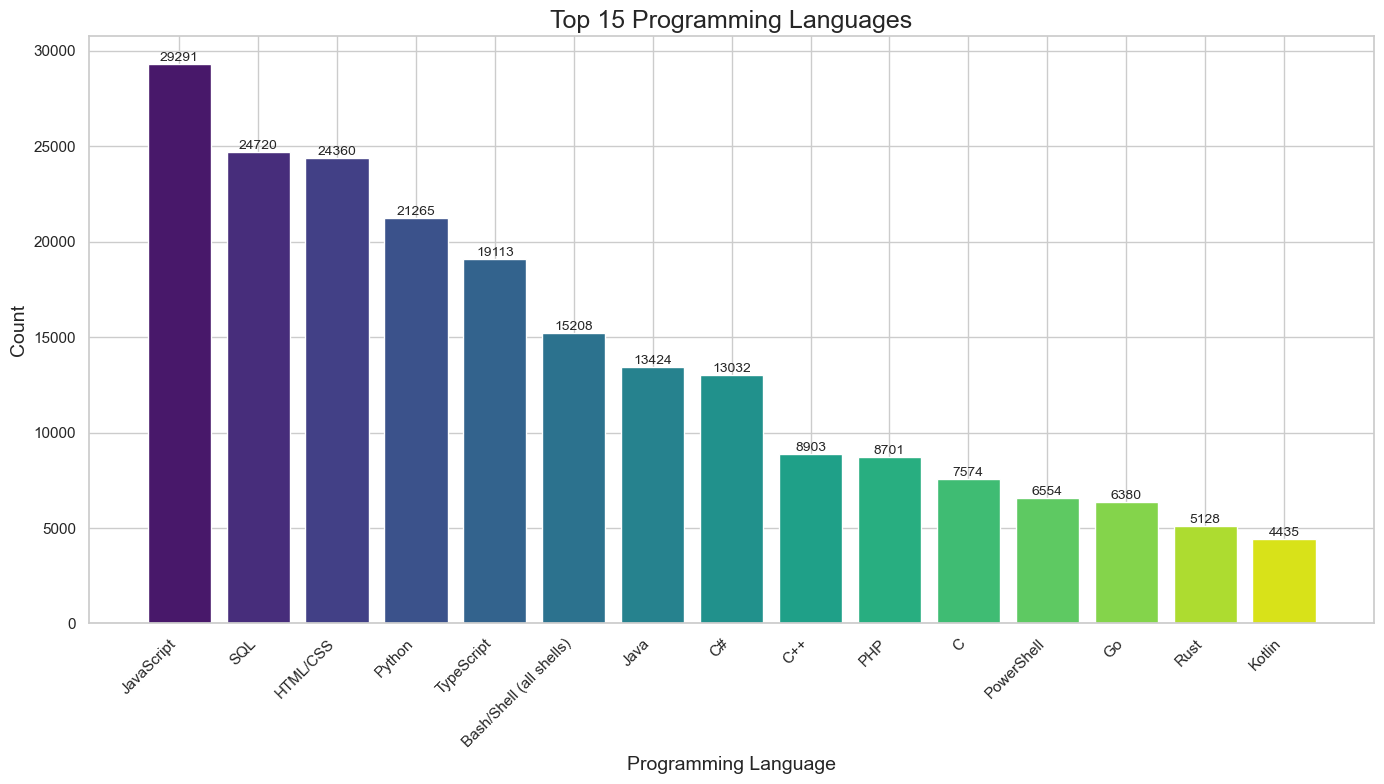

In [119]:
plt.figure(figsize=(14, 8))
bars = plt.bar(lang_df['Language'][:15], lang_df['Count'][:15], color=sns.color_palette('viridis', 15))
plt.title('Top 15 Programming Languages', fontsize=18)
plt.xlabel('Programming Language', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1, f'{int(height)}', 
             ha='center', va='bottom', fontsize=10)

plt.show()

## 2. Databases Analysis

Now let's extract unique databases from the `DatabaseHaveWorkedWith` column.

In [120]:
# Extract unique databases and their frequencies
unique_dbs, db_counts = extract_unique_tech(df, 'DatabaseHaveWorkedWith')

print(f"Found {len(unique_dbs)} unique databases:")
print(unique_dbs)

# Get top 15 most common databases
top_15_dbs = dict(sorted(db_counts.items(), key=lambda x: x[1], reverse=True)[:15])

# Create a DataFrame for visualization
db_df = pd.DataFrame({
    'Database': list(top_15_dbs.keys()),
    'Count': list(top_15_dbs.values())
}).sort_values(by='Count', ascending=False).reset_index(drop=True)

db_df

Found 35 unique databases:
['BigQuery', 'Cassandra', 'Clickhouse', 'Cloud Firestore', 'Cockroachdb', 'Cosmos DB', 'Couch DB', 'Couchbase', 'Databricks SQL', 'Datomic', 'DuckDB', 'Dynamodb', 'Elasticsearch', 'EventStoreDB', 'Firebase Realtime Database', 'Firebird', 'H2', 'IBM DB2', 'InfluxDB', 'MariaDB', 'Microsoft Access', 'Microsoft SQL Server', 'MongoDB', 'MySQL', 'Neo4J', 'Oracle', 'PostgreSQL', 'Presto', 'RavenDB', 'Redis', 'SQLite', 'Snowflake', 'Solr', 'Supabase', 'TiDB']


,Database,Count
0,PostgreSQL,20952
1,MySQL,16392
2,SQLite,13234
3,Microsoft SQL Server,11239
4,MongoDB,10301
5,Redis,8963
6,MariaDB,7099
7,Elasticsearch,5668
8,Oracle,4337
9,Dynamodb,3566


### Visualize Top Databases

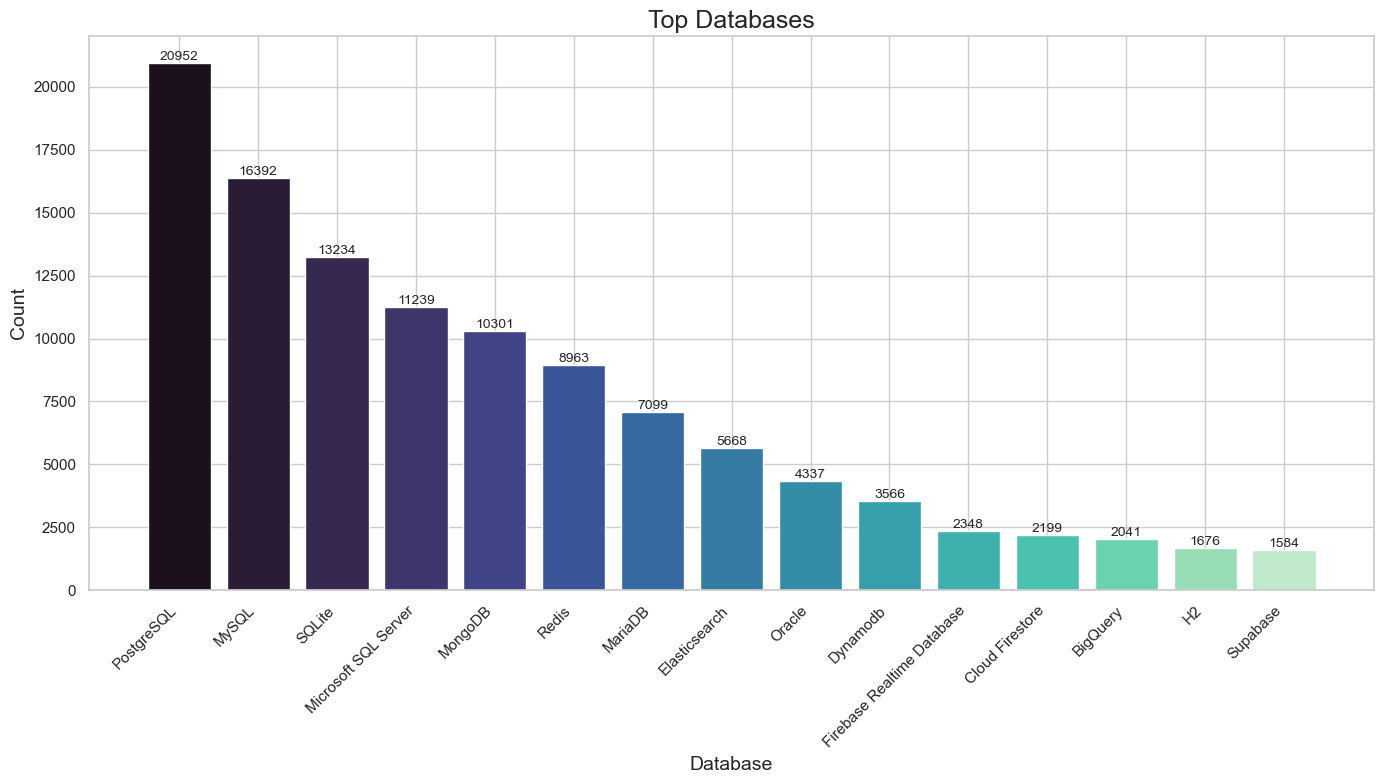

In [121]:
plt.figure(figsize=(14, 8))
bars = plt.bar(db_df['Database'], db_df['Count'], color=sns.color_palette('mako', len(db_df)))
plt.title('Top Databases', fontsize=18)
plt.xlabel('Database', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1, f'{int(height)}', 
             ha='center', va='bottom', fontsize=10)

plt.show()

## 3. Platforms Analysis

Let's extract unique platforms from the `PlatformHaveWorkedWith` column.

In [122]:
# Extract unique platforms and their frequencies
unique_platforms, platform_counts = extract_unique_tech(df, 'PlatformHaveWorkedWith')

print(f"Found {len(unique_platforms)} unique platforms:")
print(unique_platforms)

# Get top platforms
top_platforms = dict(sorted(platform_counts.items(), key=lambda x: x[1], reverse=True))

# Create a DataFrame for visualization
platform_df = pd.DataFrame({
    'Platform': list(top_platforms.keys()),
    'Count': list(top_platforms.values())
}).sort_values(by='Count', ascending=False).reset_index(drop=True)

platform_df.head(15)

Found 27 unique platforms:
['Alibaba Cloud', 'Amazon Web Services (AWS)', 'Cloudflare', 'Colocation', 'Databricks', 'Digital Ocean', 'Firebase', 'Fly.io', 'Google Cloud', 'Heroku', 'Hetzner', 'IBM Cloud Or Watson', 'Linode, now Akamai', 'Managed Hosting', 'Microsoft Azure', 'Netlify', 'OVH', 'OpenShift', 'OpenStack', 'Oracle Cloud Infrastructure (OCI)', 'PythonAnywhere', 'Render', 'Scaleway', 'Supabase', 'VMware', 'Vercel', 'Vultr']


,Platform,Count
0,Amazon Web Services (AWS),18565
1,Microsoft Azure,10776
2,Google Cloud,9068
3,Cloudflare,5405
4,Firebase,5128
5,Digital Ocean,4383
6,Vercel,4230
7,Heroku,3017
8,Netlify,2499
9,VMware,2324


### Visualize Top Platforms

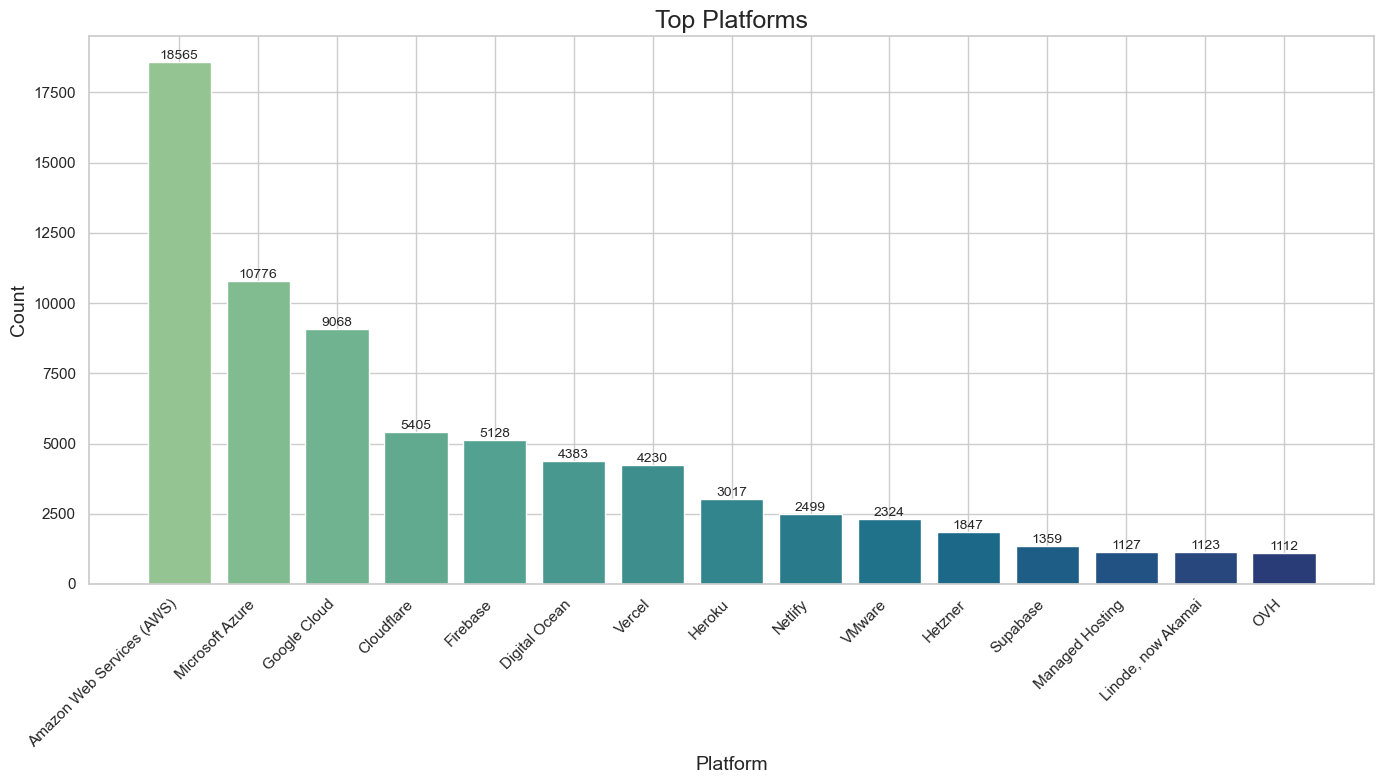

In [123]:
plt.figure(figsize=(14, 8))
top_n = min(15, len(platform_df))  # In case there are fewer than 15 platforms
bars = plt.bar(platform_df['Platform'][:top_n], platform_df['Count'][:top_n], 
               color=sns.color_palette('crest', top_n))
plt.title('Top Platforms', fontsize=18)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1, f'{int(height)}', 
             ha='center', va='bottom', fontsize=10)

plt.show()

## 4. Web Frameworks Analysis

Let's extract unique web frameworks from the `WebframeHaveWorkedWith` column.

In [124]:
# Extract unique web frameworks and their frequencies
unique_webframes, webframe_counts = extract_unique_tech(df, 'WebframeHaveWorkedWith')

print(f"Found {len(unique_webframes)} unique web frameworks:")
print(unique_webframes)

# Get top web frameworks
top_webframes = dict(sorted(webframe_counts.items(), key=lambda x: x[1], reverse=True))

# Create a DataFrame for visualization
webframe_df = pd.DataFrame({
    'WebFramework': list(top_webframes.keys()),
    'Count': list(top_webframes.values())
}).sort_values(by='Count', ascending=False).reset_index(drop=True)

webframe_df.head(15)

Found 36 unique web frameworks:
['ASP.NET', 'ASP.NET CORE', 'Angular', 'AngularJS', 'Astro', 'Blazor', 'CodeIgniter', 'Deno', 'Django', 'Drupal', 'Elm', 'Express', 'FastAPI', 'Fastify', 'Flask', 'Gatsby', 'Htmx', 'Laravel', 'NestJS', 'Next.js', 'Node.js', 'Nuxt.js', 'Phoenix', 'Play Framework', 'React', 'Remix', 'Ruby on Rails', 'Solid.js', 'Spring Boot', 'Strapi', 'Svelte', 'Symfony', 'Vue.js', 'WordPress', 'Yii 2', 'jQuery']


,WebFramework,Count
0,React,15651
1,Node.js,15531
2,jQuery,8578
3,Angular,7120
4,ASP.NET CORE,7092
5,Next.js,6994
6,Express,6911
7,Vue.js,6224
8,ASP.NET,5378
9,Spring Boot,5206


### Visualize Top Web Frameworks

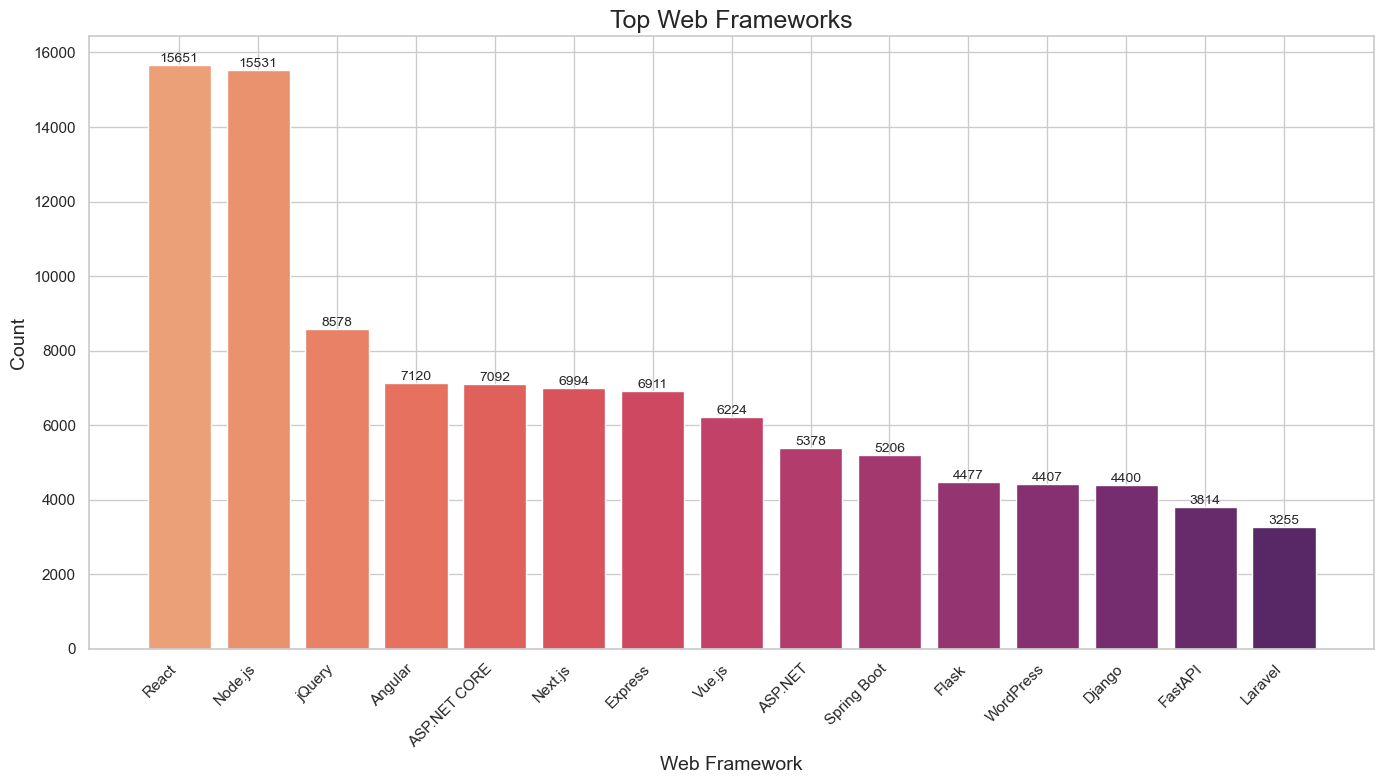

In [125]:
plt.figure(figsize=(14, 8))
top_n = min(15, len(webframe_df))  # In case there are fewer than 15 frameworks
bars = plt.bar(webframe_df['WebFramework'][:top_n], webframe_df['Count'][:top_n], 
               color=sns.color_palette('flare', top_n))
plt.title('Top Web Frameworks', fontsize=18)
plt.xlabel('Web Framework', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1, f'{int(height)}', 
             ha='center', va='bottom', fontsize=10)

plt.show()

## 5. Embedded Technologies Analysis

Let's extract unique embedded technologies from the `EmbeddedHaveWorkedWith` column.

In [126]:
# Extract unique embedded technologies and their frequencies
unique_embedded, embedded_counts = extract_unique_tech(df, 'EmbeddedHaveWorkedWith')

print(f"Found {len(unique_embedded)} unique embedded technologies:")
print(unique_embedded)

# Get top embedded technologies
top_embedded = dict(sorted(embedded_counts.items(), key=lambda x: x[1], reverse=True))

# Create a DataFrame for visualization
embedded_df = pd.DataFrame({
    'EmbeddedTech': list(top_embedded.keys()),
    'Count': list(top_embedded.values())
}).sort_values(by='Count', ascending=False).reset_index(drop=True)

embedded_df

Found 20 unique embedded technologies:
['Arduino', 'Boost.Test', 'CMake', 'CUTE', 'Cargo', 'Catch2', 'GNU GCC', "LLVM's Clang", 'MSVC', 'Meson', 'Micronaut', 'Ninja', 'PlatformIO', 'QMake', 'Rasberry Pi', 'SCons', 'ZMK', 'build2', 'cppunit', 'doctest']


,EmbeddedTech,Count
0,Rasberry Pi,7706
1,Arduino,5499
2,CMake,5321
3,GNU GCC,5177
4,LLVM's Clang,3072
5,Cargo,2917
6,MSVC,1710
7,Ninja,1458
8,PlatformIO,952
9,QMake,496


### Visualize Embedded Technologies

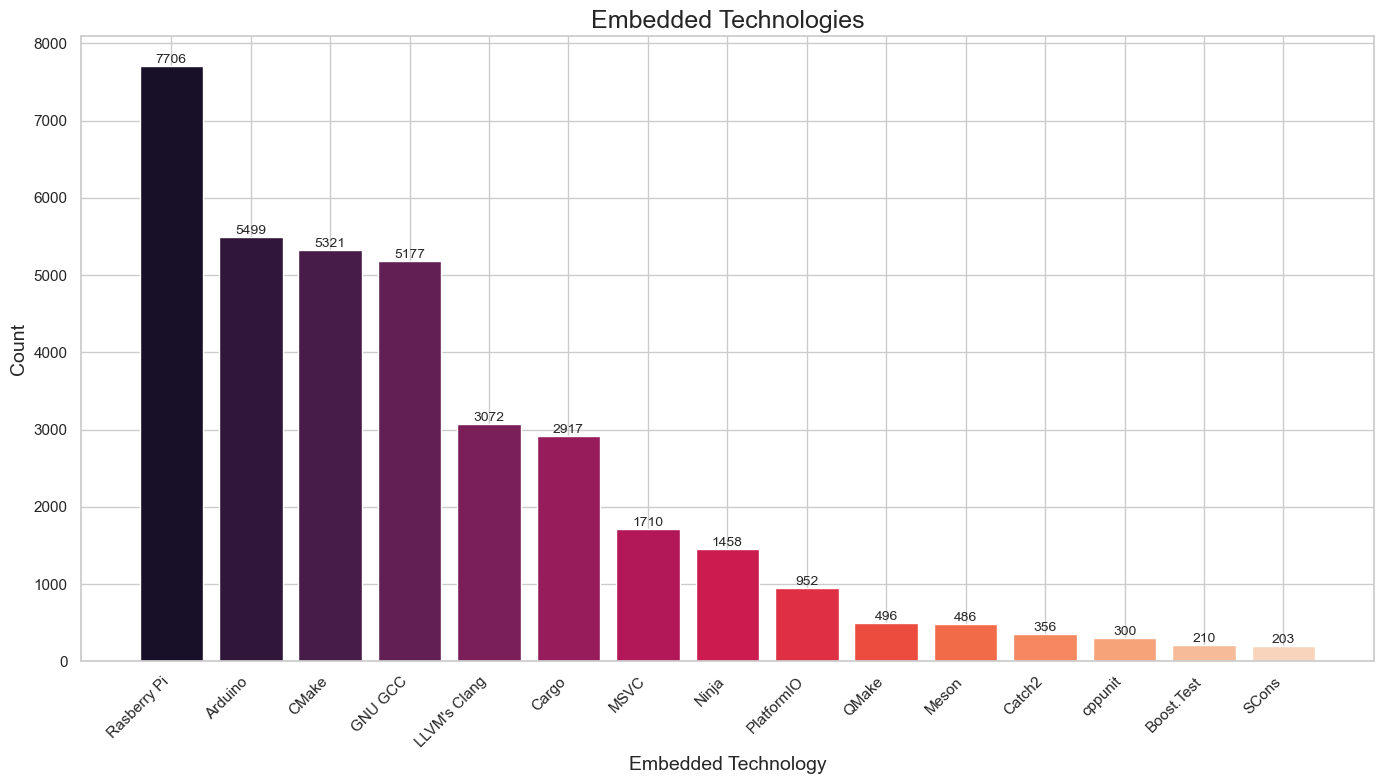

In [127]:
if not embedded_df.empty:
    plt.figure(figsize=(14, 8))
    top_n = min(15, len(embedded_df))  # In case there are fewer than 15 embedded techs
    bars = plt.bar(embedded_df['EmbeddedTech'][:top_n], embedded_df['Count'][:top_n], 
                   color=sns.color_palette('rocket', top_n))
    plt.title('Embedded Technologies', fontsize=18)
    plt.xlabel('Embedded Technology', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    # Add count labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1, f'{int(height)}', 
                 ha='center', va='bottom', fontsize=10)
    
    plt.show()
else:
    print("No embedded technologies found in the dataset.")

## 6. other frameworks and libraries  Analysis

Let's extract unique miscellaneous technologies from the `MiscTechHaveWorkedWith` column.

In [128]:
# Extract unique miscellaneous technologies and their frequencies
unique_misc, misc_counts = extract_unique_tech(df, 'MiscTechHaveWorkedWith')

print(f"Found {len(unique_misc)} unique other frameworks and libraries:")
print(unique_misc)

# Get top miscellaneous technologies
top_misc = dict(sorted(misc_counts.items(), key=lambda x: x[1], reverse=True))

# Create a DataFrame for visualization
misc_df = pd.DataFrame({
    'MiscTech': list(top_misc.keys()),
    'Count': list(top_misc.values())
}).sort_values(by='Count', ascending=False).reset_index(drop=True)

misc_df.head(20)

Found 39 unique other frameworks and libraries:
['.NET (5+)', '.NET Framework (1.0 - 4.8)', '.NET MAUI', 'Apache Kafka', 'Apache Spark', 'CUDA', 'Capacitor', 'Cordova', 'DirectX', 'Electron', 'Flutter', 'GTK', 'Hadoop', 'Hugging Face Transformers', 'Ionic', 'JAX', 'Keras', 'Ktor', 'MFC', 'NumPy', 'OpenCL', 'OpenGL', 'Opencv', 'Pandas', 'Qt', 'Quarkus', 'RabbitMQ', 'React Native', 'Roslyn', 'Ruff', 'Scikit-Learn', 'Spring Framework', 'SwiftUI', 'Tauri', 'TensorFlow', 'Tidyverse', 'Torch/PyTorch', 'Xamarin', 'mlflow']


,MiscTech,Count
0,.NET (5+),9419
1,Pandas,6428
2,.NET Framework (1.0 - 4.8),6337
3,NumPy,6185
4,RabbitMQ,4362
5,Spring Framework,4341
6,Apache Kafka,3702
7,Flutter,3313
8,React Native,3140
9,Scikit-Learn,3046


### Visualize Top other frameworks and libraries

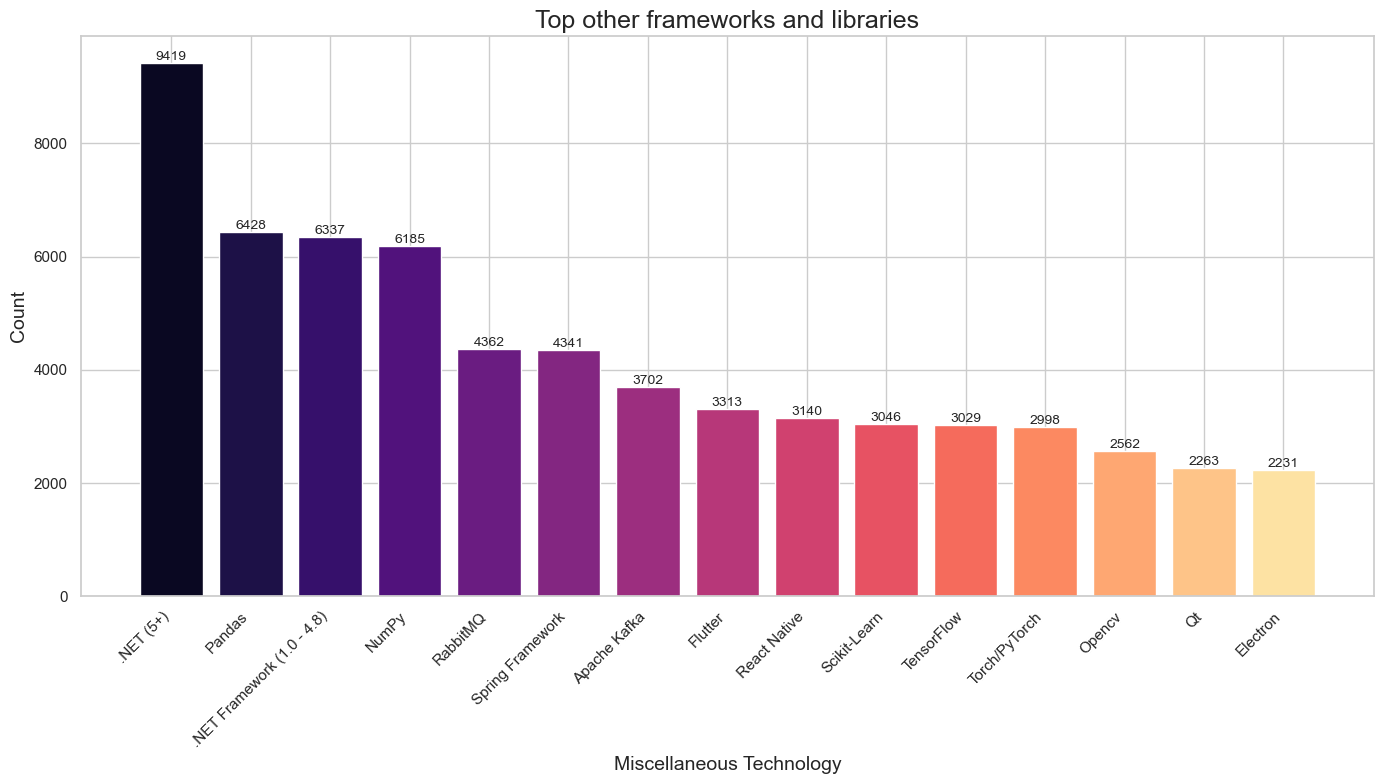

In [129]:
if not misc_df.empty:
    plt.figure(figsize=(14, 8))
    top_n = min(15, len(misc_df))  # In case there are fewer than 15 misc techs
    bars = plt.bar(misc_df['MiscTech'][:top_n], misc_df['Count'][:top_n], 
                   color=sns.color_palette('magma', top_n))
    plt.title('Top other frameworks and libraries', fontsize=18)
    plt.xlabel('Miscellaneous Technology', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    # Add count labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1, f'{int(height)}', 
                 ha='center', va='bottom', fontsize=10)
    
    plt.show()
else:
    print("No other frameworks and libraries found in the dataset.")

## 7. Tools and Technologies Analysis

Finally, let's extract unique tools and technologies from the `ToolsTechHaveWorkedWith` column.

In [130]:
# Extract unique tools and their frequencies
unique_tools, tool_counts = extract_unique_tech(df, 'ToolsTechHaveWorkedWith')

print(f"Found {len(unique_tools)} unique tools and technologies:")
print(unique_tools)

# Get top tools
top_tools = dict(sorted(tool_counts.items(), key=lambda x: x[1], reverse=True)[:20])

# Create a DataFrame for visualization
tools_df = pd.DataFrame({
    'Tool': list(top_tools.keys()),
    'Count': list(top_tools.values())
}).sort_values(by='Count', ascending=False).reset_index(drop=True)

tools_df

Found 34 unique tools and technologies:
['APT', 'Ansible', 'Ant', 'Bun', 'Chef', 'Chocolatey', 'Composer', 'Dagger', 'Docker', 'Godot', 'Google Test', 'Gradle', 'Homebrew', 'Kubernetes', 'MSBuild', 'Make', 'Maven (build tool)', 'Ninja', 'Nix', 'NuGet', 'Pacman', 'Pip', 'Podman', 'Pulumi', 'Puppet', 'Terraform', 'Unity 3D', 'Unreal Engine', 'Visual Studio Solution', 'Vite', 'Webpack', 'Yarn', 'npm', 'pnpm']


,Tool,Count
0,Docker,24140
1,npm,21898
2,Pip,12474
3,Homebrew,9940
4,Kubernetes,8948
5,Vite,8901
6,Yarn,8748
7,Webpack,8689
8,Make,8049
9,NuGet,7423


### Visualize Top Tools and Technologies

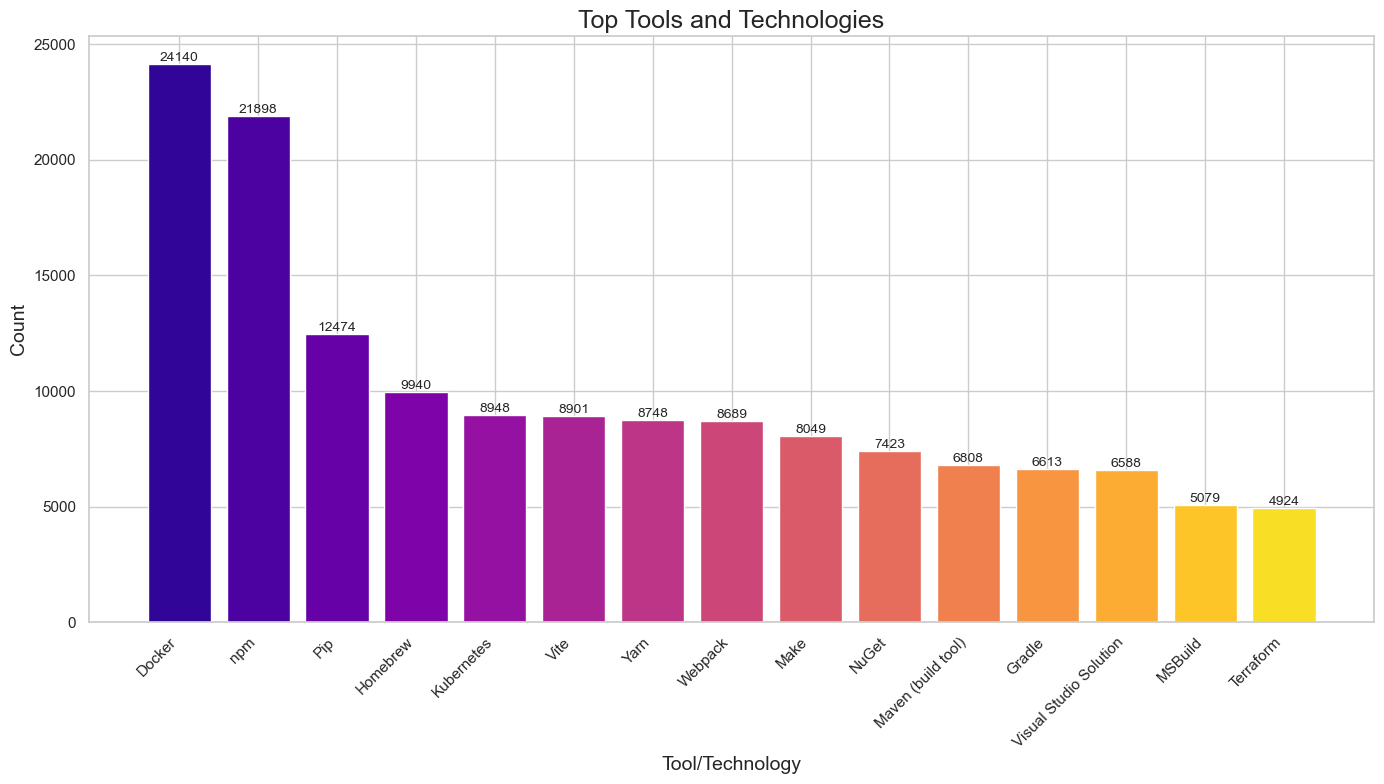

In [131]:
plt.figure(figsize=(14, 8))
top_n = min(15, len(tools_df))  # In case there are fewer than 15 tools
bars = plt.bar(tools_df['Tool'][:top_n], tools_df['Count'][:top_n], 
               color=sns.color_palette('plasma', top_n))
plt.title('Top Tools and Technologies', fontsize=18)
plt.xlabel('Tool/Technology', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1, f'{int(height)}', 
             ha='center', va='bottom', fontsize=10)

plt.show()

## Summary of All Unique Technologies

Let's create a comprehensive dictionary of all unique technologies across all categories.

In [132]:
# Create a dictionary to hold all categories and their unique technologies
all_tech_categories = {
    'Programming Languages': unique_langs,
    'Databases': unique_dbs,
    'Platforms': unique_platforms,
    'Web Frameworks': unique_webframes,
    'Embedded Technologies': unique_embedded,
    'other frameworks and libraries': unique_misc,
    'Tools and Technologies': unique_tools
}

# Print a summary
print("Summary of Unique Technologies by Category:")
for category, techs in all_tech_categories.items():
    print(f"{category}: {len(techs)} unique items")

# Total unique technologies across all categories (may have some overlap)
all_techs = set()
for techs in all_tech_categories.values():
    all_techs.update(techs)

print(f"\nTotal unique technologies across all categories: {len(all_techs)}")

Summary of Unique Technologies by Category:
Programming Languages: 49 unique items
Databases: 35 unique items
Platforms: 27 unique items
Web Frameworks: 36 unique items
Embedded Technologies: 20 unique items
other frameworks and libraries: 39 unique items
Tools and Technologies: 34 unique items

Total unique technologies across all categories: 238


## Export the Unique Technologies

Let's save the unique technologies to CSV files for future reference.

In [133]:
# Export all unique technologies combined
# Create a DataFrame for all unique technologies
all_techs_df = pd.DataFrame({
    'Technology': sorted(list(all_techs))
})
all_techs_df.to_csv(f"{output_dir}all_unique_technologies.csv", index=False)
print(f"Exported {len(all_techs)} combined unique technologies to {output_dir}all_unique_technologies.csv")


Exported 238 combined unique technologies to ../data/interim/all_unique_technologies.csv


## Conclusion

We have successfully extracted and analyzed unique technologies from the Stack Overflow Developer Survey data. This information can be useful for understanding the technology landscape and for further analyses in the CareerConnect project.

The key findings include:
- The most popular programming languages
- The most widely used databases
- Common platforms used by developers
- Popular web frameworks
- Common embedded technologies
- other frameworks and libraries
- Popular tools used by developers

All this data has been saved to CSV files for future reference and use in other parts of the project.